In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#What is OCR?

"The acronym ‘OCR’ stands for Optical Character Recognition. Commonly known as ‘Text Recognition,’ it is a popular technique for extracting text from images."

"An OCR program is a tool that extracts and re-purposes data from scanned documents, camera images, and image-only pdf. An OCR system uses a combination of hardware, such as optical scanners and software capable of image processing."

"For text extraction, the OCR tools (OCR libraries) employ several machine algorithms for pattern recognition to identify the presence and layout of the text in an image file."

https://www.analyticsvidhya.com/blog/2022/09/extract-text-from-images-quickly-using-keras-ocr-pipeline/

![](https://i.ytimg.com/vi/Qxoe-f_L8i0/maxresdefault.jpg)https://www.youtube.com/watch?v=Qxoe-f_L8i0

#All script by Meet Nagadia

https://www.kaggle.com/code/meetnagadia/extract-text-from-images/notebook

#Install keras-ocr library

In [3]:
!pip install -q keras-ocr
from IPython.display import clear_output   
clear_output()

In [16]:
# # Alternative way to install library
# ! pip install git+https://github.com/faustomorales/keras-ocr.git 

In [10]:
import keras_ocr
import matplotlib.pyplot as plt

In [11]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [14]:
from tqdm import tqdm
import os

In [15]:
cropped_dataset_location = '/kaggle/input/cropped-place/cropped_plates'
img_paths = []


In [18]:
for img_file in tqdm(os.listdir(cropped_dataset_location), desc='OCR'):
    if img_file.endswith('jpg'):
        img_path = os.path.join(cropped_dataset_location, img_file)
        img_paths.append(img_path)

OCR: 100%|██████████| 370/370 [00:00<00:00, 506492.32it/s]


In [19]:
img_paths[0]

'/kaggle/input/cropped-place/cropped_plates/plate_00227.jpg'

In [20]:
# Read images from folder path to image object
images = [
    keras_ocr.tools.read(img) for img in tqdm(img_paths, desc="Reading images")
]

Reading images: 100%|██████████| 370/370 [00:03<00:00, 109.37it/s]


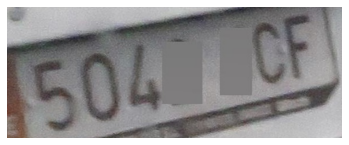

In [24]:
plt.imshow(images[0])  # Display the first image
plt.axis('off')        # Turn off the axis for a cleaner display
plt.show() 

In [21]:
prediction_groups = []
for image in tqdm(images, desc="Recognizing text"):
    prediction_groups.append(pipeline.recognize([image])[0])

Recognizing text: 100%|██████████| 370/370 [05:44<00:00,  1.07it/s]


In [36]:
!ls

out_dir		  plate_00513.json  plate_01065.json  plate_01523.json
plate_00000.json  plate_00523.json  plate_01070.json  plate_01525.json
plate_00014.json  plate_00531.json  plate_01073.json  plate_01528.json
plate_00015.json  plate_00533.json  plate_01077.json  plate_01529.json
plate_00016.json  plate_00553.json  plate_01082.json  plate_01531.json
plate_00022.json  plate_00560.json  plate_01083.json  plate_01533.json
plate_00024.json  plate_00577.json  plate_01090.json  plate_01544.json
plate_00035.json  plate_00578.json  plate_01093.json  plate_01546.json
plate_00037.json  plate_00588.json  plate_01094.json  plate_01547.json
plate_00038.json  plate_00589.json  plate_01117.json  plate_01560.json
plate_00075.json  plate_00591.json  plate_01121.json  plate_01563.json
plate_00076.json  plate_00606.json  plate_01122.json  plate_01565.json
plate_00077.json  plate_00611.json  plate_01127.json  plate_01566.json
plate_00091.json  plate_00617.json  plate_01128.json  plate_01567.json
plate_00093.j

In [38]:
!zip -r k.zip /kaggle/working/output

  adding: kaggle/working/output/ (stored 0%)
  adding: kaggle/working/output/plate_01500.json (stored 0%)
  adding: kaggle/working/output/plate_01146.json (stored 0%)
  adding: kaggle/working/output/plate_00076.json (stored 0%)
  adding: kaggle/working/output/plate_00181.json (stored 0%)
  adding: kaggle/working/output/plate_00358.json (stored 0%)
  adding: kaggle/working/output/plate_01744.json (stored 0%)
  adding: kaggle/working/output/plate_00961.json (stored 0%)
  adding: kaggle/working/output/plate_01209.json (stored 0%)
  adding: kaggle/working/output/plate_01454.json (stored 0%)
  adding: kaggle/working/output/plate_00915.json (stored 0%)
  adding: kaggle/working/output/plate_00220.json (stored 0%)
  adding: kaggle/working/output/plate_00386.json (stored 0%)
  adding: kaggle/working/output/plate_01883.json (stored 0%)
  adding: kaggle/working/output/plate_00668.json (stored 0%)
  adding: kaggle/working/output/plate_00510.json (stored 0%)
  adding: kaggle/working/output/plate_01

In [37]:
import json

results_dir = '/kaggle/working/output'
os.makedirs(results_dir, exist_ok=True)

for i in range(len(prediction_groups)):
    txt = ""
    for text, _ in prediction_groups[i]:
        txt += text
    output_txt_path = os.path.join(results_dir, img_paths[i].split('/')[-1][:-3]+'json')
    # print(output_txt_path)
    with open(output_txt_path, 'w') as f:
            dict_lst = [{'Text' : txt, 'Probability' : 100}]
            json.dump(dict_lst, f)
    

In [25]:
prediction_groups[0]

[('ce',
  array([[351.90894  ,  56.677914 ],
         [531.0573   ,   6.0490227],
         [560.6188   , 110.651215 ],
         [381.4704   , 161.2801   ]], dtype=float32)),
 ('sol',
  array([[ 37.320717,  99.17377 ],
         [307.77472 ,  60.051464],
         [325.698   , 183.95566 ],
         [ 55.243988, 223.07796 ]], dtype=float32))]

#Plot the predictions from the model

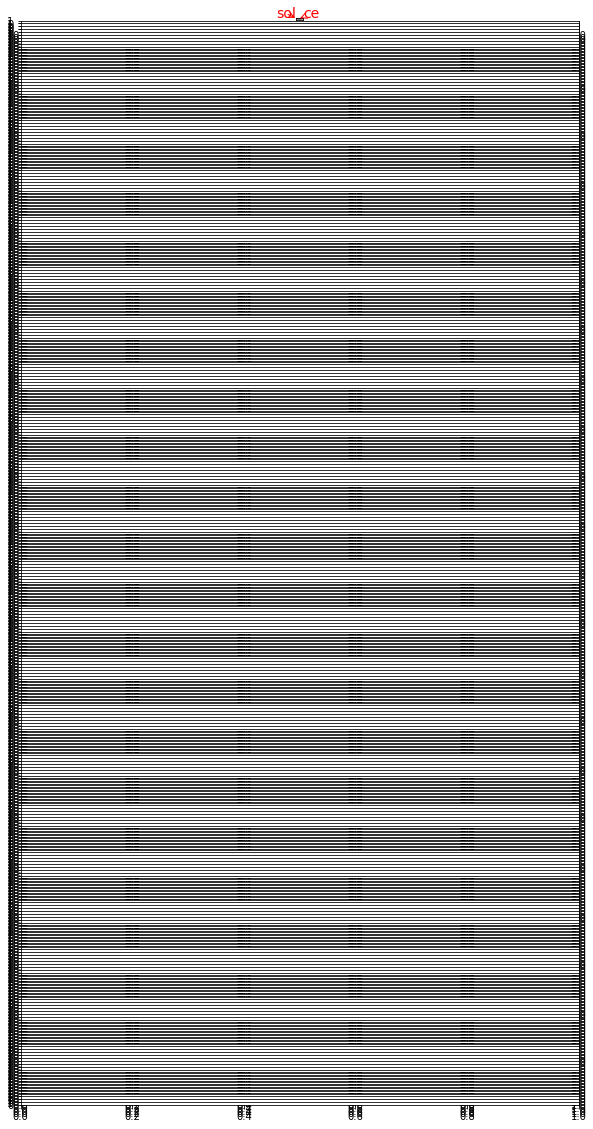

In [23]:
# plot the text predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(10, 20))
for ax, image, predictions in zip(axs, images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image, 
                                    predictions=predictions, 
                                    ax=ax)
    break

#Print the identified text from the images

In [8]:
predicted_image = prediction_groups[1]
for text, box in predicted_image:
    print(text)

highlevel
training
apls
builtin
trainingleval
loops
easy
to
use
tensor
flow
customized
stepbystep
loops
lowlevel
highlevel
architecture
apls
custom
layers
sequential
architecture
apis
model
subclassing
full
functional
api
fully
flexible
keras
trainingleval
k
loops
from
scratch
lowlevel
training
apis


#Above the words Tensor Flow and Keras appeared, though where is Pytorch?

In [9]:
# Read images from folder path to image object
images = [
    keras_ocr.tools.read(img) for img in ['../input/cusersmarildownloadsransacjpg/cnn.jpg'
                                          ]
]

In [10]:
# generate text predictions from the images
prediction_groups = pipeline.recognize(images)

In [11]:
predicted_image = prediction_groups[0]
for text, box in predicted_image:
    print(text)

object
detection
using
bird
bird
bird
bird
bird
ird
pytorch
faster
bird
bird
birdir
brd
rcnn
pird
bird
mobilenetvs


#Now we got Pytorch, MobileNetvs and birds (above)

#Acknowledgements:

Meet Nagadia  https://www.kaggle.com/code/meetnagadia/extract-text-from-images/notebook